# Single Player, Many Cards Sequence Game

In this simulation of the game, there is a single player who begins the game with a certain number of randomly drawn cards from the deck pile. At the beginning of their turn, they play the card from their hand that has the smallest total distance to all the occupied spots. They draw another card from the deck to replace the one they just played. After each turn, the player will check for a sequence, and if they have achieved one, the game will end. 

In [1]:
from sequence_functions import *

In [2]:
current_board, current_draw_pile = initialize_game_state(num_players=1)

# player draws five cards before game start
current_player_hand = []
for i in range(5):
    card_ind = np.random.randint(0, len(current_draw_pile))
    current_player_hand.append(current_draw_pile[card_ind])
    current_draw_pile.remove(current_draw_pile[card_ind])
# print(current_player_hand)

num_turns = 0
game_end = False
while not game_end:
    # choose best card from hand to play
    the_best_dists = 999999999
    the_best_spot = 0
    the_best_card = 0
    for card in current_player_hand:
        best_spot_result = best_spot(board_state=current_board, chosen_card=card)
        if best_spot_result[1] < the_best_dists:
            the_best_dists = best_spot_result[1]
            the_best_spot = best_spot_result[0]
            the_best_card = card
    # play best card from hand
    roww = the_best_spot[0]
    coll = the_best_spot[1]
    current_board[roww][coll] = 1
    current_player_hand.remove(the_best_card)
    # draw new card from deck
    card_ind = np.random.randint(0, len(current_draw_pile))
    current_player_hand.append(current_draw_pile[card_ind])
    current_draw_pile.remove(current_draw_pile[card_ind])
    # check for win condition
    game_end = check_for_sequence(current_board)
    # visualize_the_board(current_board)
    num_turns += 1

print("Number of turns to win: ", num_turns)

Number of turns to win:  26


In [3]:
def play_game(starting_hand):
    """
    This function simulates a sequence game with a single player, who has a given number
    of cards in their hand. It returns the number of turns it takes them to win.
    
    :param starting_hand: number of cards the player has in their hand
    :return: the number of turns it takes to win
    """
    
    curr_board, curr_draw_pile = initialize_game_state(num_players=1)
    
    # player draws five cards before game start
    player_hand = []
    for i in range(starting_hand):
        ind = np.random.randint(0, len(curr_draw_pile))
        player_hand.append(curr_draw_pile[ind])
        curr_draw_pile.remove(curr_draw_pile[ind])
    
    tot_turns = 0
    game_end_check = False
    while not game_end_check:
        # choose best card from hand to play
        card_dist = 999999999
        card_spot = 0
        card_to_play = 0
        for the_card in player_hand:
            result = best_spot(board_state=curr_board, chosen_card=the_card)
            if result[1] < card_dist:
                card_dist = result[1]
                card_spot = result[0]
                card_to_play = the_card
        # play best card from hand
        row = card_spot[0]
        col = card_spot[1]
        curr_board[row][col] = 1
        player_hand.remove(card_to_play)
        # draw new card from deck
        ind = np.random.randint(0, len(curr_draw_pile))
        player_hand.append(curr_draw_pile[ind])
        curr_draw_pile.remove(curr_draw_pile[ind])
        # check for win condition
        game_end_check = check_for_sequence(curr_board)
        tot_turns += 1
    
    return tot_turns

Text(0, 0.5, 'Number of Wins')

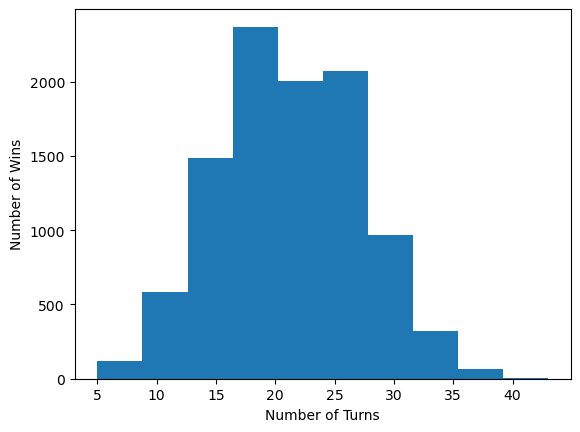

In [6]:
# it took about 40 seconds to run 10000 games for a start_hand of 5
start_hand = 5
num_sims = 10000
turns_data = []

for i in range(num_sims):
    turns_data.append(play_game(start_hand))

plt.hist(turns_data)
plt.xlabel('Number of Turns')
plt.ylabel('Number of Wins')

Text(0, 0.5, 'Number of Wins')

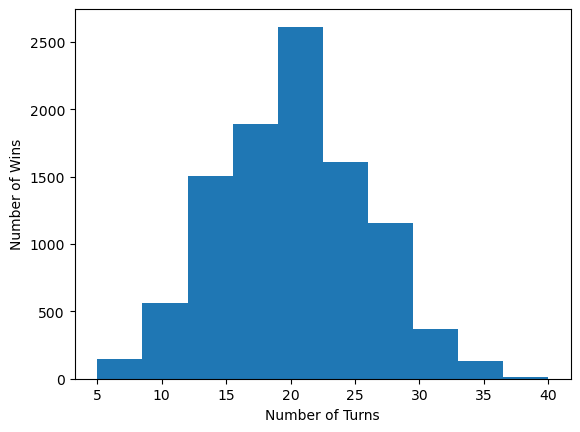

In [7]:
# it took about 50 seconds to run 10000 games for a start_hand of 7
start_hand = 7
num_sims = 10000
turns_data = []

for i in range(num_sims):
    turns_data.append(play_game(start_hand))

plt.hist(turns_data)
plt.xlabel('Number of Turns')
plt.ylabel('Number of Wins')